<a href="https://www.kaggle.com/code/wenbinyeung/kidney-condition-prediction-resnet-ml-models?scriptVersionId=187638517" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

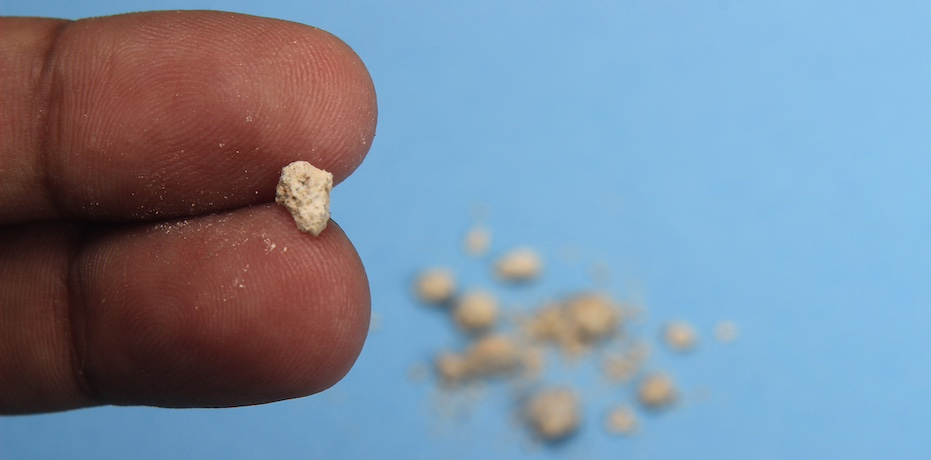

<h1>
        University Project: Kidney Condition Prediction Using ResNet And ML Models
</h1>

Hello 👋🏼
This **Kaggle Notebook** consists of work that I have done as part of my **university assignments**.

The purpose of this notebook is to **showcase the application of a deep learning model, Residual Networks (ResNet)**. Using Tensorflow and Keras APIs, train set and test set images of patient kidneys with varying conditions (cyst, normal, stone, tumor) will be fed into ResNet. The output from ResNet will then be fed into another machine learning (ML) model for **kidney stone prediction**.

***

<div id = "part1">
    <h1>
        Part 1: Data Preparation & Loading Packages
    </h1>
</div>

In [ ]:
pip install split-folders

In [ ]:
# Import packages for ResNet and models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import resnet50, ResNet50
from sklearn import linear_model
from sklearn import ensemble
from sklearn import neural_network
import os
import numpy as np
import cv2


# Import package for train-test split
import splitfolders


# Import package for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix

***

<div id = "part2">
    <h1>
        Part 2: ResNet Model
    </h1>
</div>


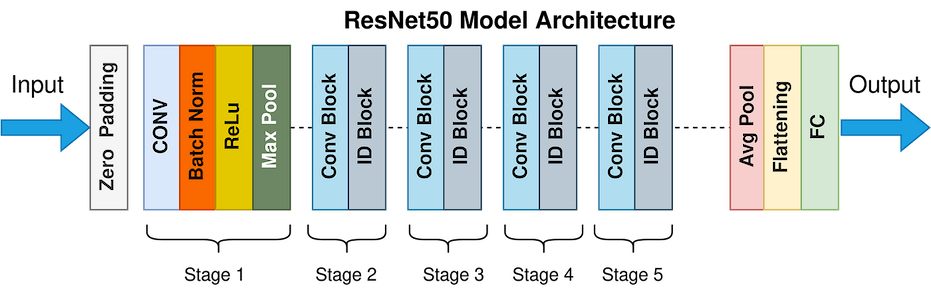

Image Credit [WikiMedia Commons](https://commons.wikimedia.org/wiki/File:ResNet50.png)

There are various operations that happen in each layer of the residual network. To have a deeper understanding of how the operations that happen in each layer of ResNet, consider reading [Pablo Ruiz's](https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8) blog published on [towardsdatascience.com](https://towardsdatascience.com/).





***

<div id = "part2.1">
    <h1>
        Part 2.1: Example Of Transforming Image Input From 3 Dimensional Data To 1 Dimension In ResNet
    </h1>
</div>

Using a sample image, we will show the process of passing an image through ResNet and attaining a prediction.

In [ ]:
# Create a ResNet Model
res_model = ResNet50(weights = "imagenet", input_shape = (150, 150, 3), include_top = False)

In [ ]:
# Load sample image and resize to desired dimensions
# In this case, 150px by 150px
img = cv2.imread("/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/Stone- (1).jpg")
img = cv2.resize(img, (150, 150))

In [ ]:
# Convert sample image to array using Numpy
img = image.img_to_array(img)
img

In [ ]:
# Preprocess the Numpy array encoding of sample image through ResNet, then
# Make a prediction using ResNet
img = resnet50.preprocess_input(np.expand_dims(img.copy(), axis = 0))
img = res_model.predict(img)

In [ ]:
# Initially, the sample image is made of a 3-dimension matrix
img.shape

# (1, 5, 5, 2048)

In [ ]:
# Flatten image to 1 dimension
img = img.flatten()
img.shape

# (51200,)

***

<div id = "part2.2">
    <h1>
        Part 2.2: Embedding & Flattening Of Trainset & Testset Data
    </h1>
</div>

We will now apply the steps from **Part 2.1** across the entire dataset.

Using [split-folders](https://pypi.org/project/split-folders/) library, we will separate the dataset into a **trainset** and **testset**. We will then use the [os.listdir()](https://www.geeksforgeeks.org/python-os-listdir-method/) and [os.path.join](https://www.geeksforgeeks.org/python-os-path-join-method/) methods to create file paths for the original image, and its predicted output from ResNet.

Lastly, we will feed each image through ResNet to attain a prediction. ResNet predictions will be stored in x-lists (x_train, x_test), while the original image will be stored in y-lists (y_train, y_test).

In [ ]:
# Create train-val-test split (70-10-20 split), and create a output directory
input_folder = "/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"
output = "/kaggle/working/"
splitfolders.ratio(input_folder, output = output, seed = 42, ratio = (.7, .1, .2))

In [ ]:
# Embed every file in the train set


# Set trainset and testset directory
train = "/kaggle/working/train"
test = "/kaggle/working/test"


# Create an empty list to store flattened image array encoding that we will pass through ResNet
x_train = []
y_train = []


# For every image in the trainset, we want to perform the following tasks:
# 1. Resize image to appropriate dimensions
# 2. Convert image to an array using Numpy
# 3. Preprocess the Numpy array encoding of each image through ResNet
# 4. Run each image through ResNet to make a prediction
# 5. Flatten each prediction into 1 dimension
# 6. Append the ResNet predicted images into x_train
# 7. Append original image into y_train
for i in os.listdir(train):
    for j in os.listdir(os.path.join(train, i)):
        img = cv2.imread(os.path.join(train, i, j))
        img = cv2.resize(img, (150, 150))
        img = image.img_to_array(img)
        img = resnet50.preprocess_input(np.expand_dims(img.copy(), axis = 0))
        img = res_model.predict(img)
        img = img.flatten()
        x_train.append(img)
        y_train.append(i)

In [ ]:
# Embed every file in the test set


# Create an empty list to store flattened image array encoding that we will pass through ResNet
x_test = []
y_test = []


# For every image in the testset, we want to perform the following tasks:
# 1. Resize image to appropriate dimensions
# 2. Convert image to an array using Numpy
# 3. Preprocess the Numpy array encoding of each image through ResNet
# 4. Run each image through ResNet to make a prediction
# 5. Flatten each prediction into 1 dimension
# 6. Append the ResNet predicted images into x_test
# 7. Append original image into y_test
for i in os.listdir(test):
  for j in os.listdir(os.path.join(test,i)):
    img = cv2.imread(os.path.join(test, i, j))
    img = cv2.resize(img,(150, 150))
    img = image.img_to_array(img)
    img = resnet50.preprocess_input(np.expand_dims(img.copy(), axis = 0))
    img = res_model.predict(img)
    img = img.flatten()
    x_test.append(img)
    y_test.append(i)

***

<div id = "part3">
    <h1>
        Part 3: Applying ResNet Output To ML Models
    </h1>
</div>

In this segment, 2 models will be used to predict the accurate kidney conditions: Random Forest and Neural Network

In [ ]:
# Using Random Forest
rf_model = ensemble.RandomForestClassifier()
rf_model.fit(x_train, y_train)
pred = rf_model.predict(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(accuracy_score(y_test, pred))

In [ ]:
# Using Neural Network
nn_model = neural_network.MLPClassifier()
nn_model.fit(x_train, y_train)
pred = nn_model.predict(x_test)
cm = confusion_matrix(y_test, pred)
print(cm)
print(accuracy_score(y_test, pred))

**Comparing Accuracy Of Different Models On Test Set (4 d.p.):**

* ResNet + Random Forest     = 0.9952
* ResNet + Neural Network    = 0.9992

Both ML models boast extremely high accuracy scores, however **ResNet + Neural Network** achieved the highest accuracy of **0.9992**.

While ResNet is a powerful tool that can improve the performance of image prediction, a **significant amount of time is needed to embed every image file**. For this project, the trainset required roughly **40 + mins**, while the test set required roughly **10 + mins**.